In [9]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

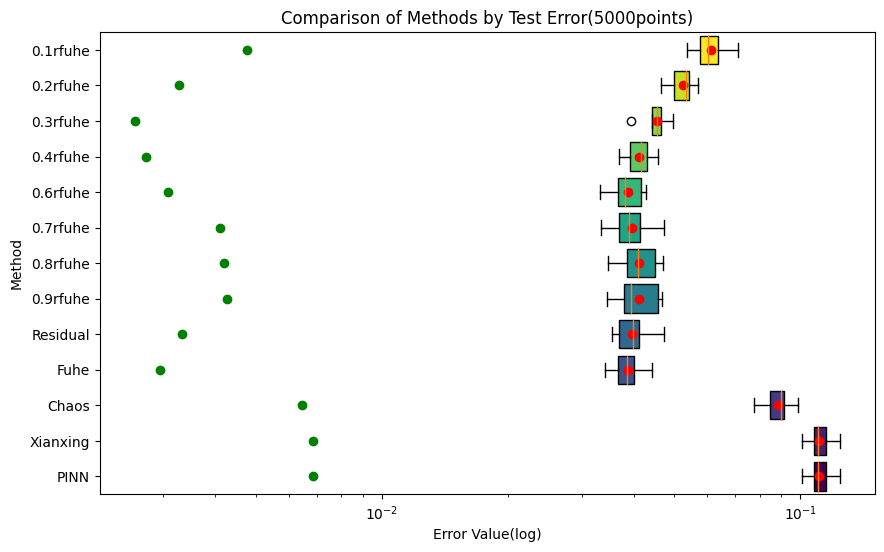

In [10]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.10953325313038995, 0.10188950457578162, 0.11889617111871822, 0.10771904401188025, 0.11101083296091012, 0.11146770080110441, 0.11647740086001968, 0.10848939525127936, 0.1009122885207745, 0.12409532624222318],
    'Xianxing': [0.10947945665782749, 0.10190817115631481, 0.1188951907280635, 0.10772464995971719, 0.11102378486039224, 0.11150517397262068, 0.11648380909535287, 0.10852233283032488, 0.10093166610633443, 0.12412430606275147],
    'Chaos': [0.08605067515202583, 0.07748435797792316, 0.0988215182597872, 0.08437622767479341, 0.08921831142647041, 0.09095750672942092, 0.09106307251318482, 0.09187917095042711, 0.07951185242772535, 0.09623896108638826],
    'Fuhe': [0.037936496189322884, 0.04050119566267855, 0.044196454033012846, 0.03890533986088497, 0.038977644009391015, 0.042200522507327115, 0.0349127112532306, 0.0363166704844416, 0.03416121866812038, 0.03830159375252316],
    'Residual': [0.0356564169177114, 0.04051331504555377, 0.041845695254423325, 0.03850233913478316, 0.03554342828971478, 0.039930981395433225, 0.03628942228964212, 0.04714548408049983, 0.04149320351822568, 0.03975922480273192],
    '0.9rfuhe': [0.0344850049817887, 0.044438915013490614, 0.03904594100906412, 0.03959005149512266, 0.03759622767013974, 0.04616636308905981, 0.03726158830456647, 0.046695930186240575, 0.04671273766566646, 0.03877998586979752],
    '0.8rfuhe': [0.03469306690157963, 0.04633063452409157, 0.03993467268324893, 0.041807776108568714, 0.038227051339685264, 0.0470882888400942, 0.035113446925839634, 0.045839657284879244, 0.04245575061099326, 0.03970931278690517],
    '0.7rfuhe': [0.035628380352151164, 0.041849645286346784, 0.03970445129004053, 0.039127322209891326, 0.03653386385419478, 0.04735465640248727, 0.033378790598153976, 0.04564191175806236, 0.0388443546230107, 0.03805285095745645],
    '0.6rfuhe': [0.036407582983944115, 0.04176155892694664, 0.04244053328863605, 0.03794744200903683, 0.03780773057698888, 0.04286591254887914, 0.033232901583658325, 0.04155930345512945, 0.03561501977071334, 0.0381180189161073],
    '0.4rfuhe': [0.04207242081981946, 0.042881263570432725, 0.04559125301542854, 0.039001022851995894, 0.041390747007462064, 0.04420840427845619, 0.03992720026918094, 0.037532875771919896, 0.03680549454621753, 0.04313845954564947],
    '0.3rfuhe': [0.044795508422303947, 0.044119833490910455, 0.04967132762157997, 0.046542773827429176, 0.0451087381285366, 0.04755204796367304, 0.046016865208819105, 0.044159668402243335, 0.039348172091406314, 0.04649875892495137],
    '0.2rfuhe': [0.0539894494693769, 0.05288504519578148, 0.05640810539300062, 0.04906516022299442, 0.04833709445297582, 0.05683899605992693, 0.05233678980851916, 0.0544488588791398, 0.04644489537535848, 0.053790150056970215],
    '0.1rfuhe': [0.060543607850604586, 0.05708105629703577, 0.06585817569650977, 0.05708750571878947, 0.06001812301218618, 0.06424641671197322, 0.06156475810558635, 0.059573430972350905, 0.053531788681548315, 0.07110735931110265]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(5000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

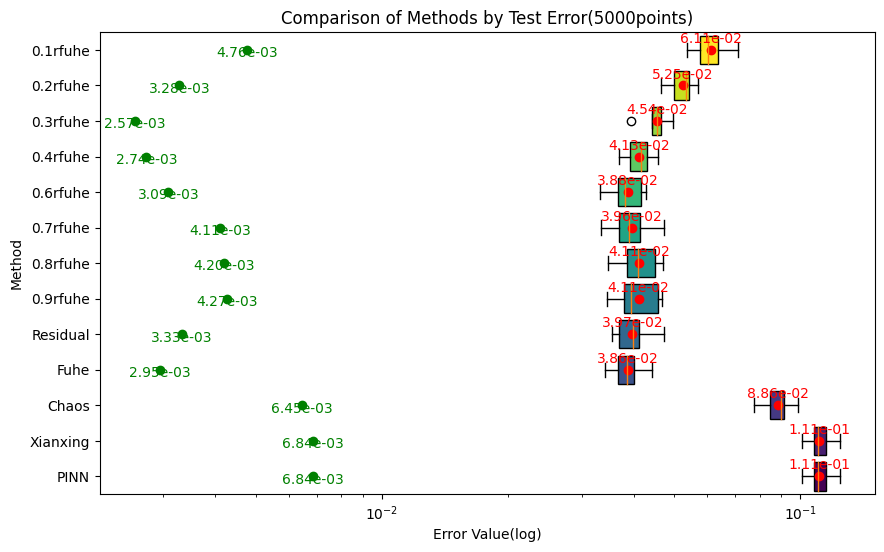

In [11]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.10953325313038995, 0.10188950457578162, 0.11889617111871822, 0.10771904401188025, 0.11101083296091012, 0.11146770080110441, 0.11647740086001968, 0.10848939525127936, 0.1009122885207745, 0.12409532624222318],
    'Xianxing': [0.10947945665782749, 0.10190817115631481, 0.1188951907280635, 0.10772464995971719, 0.11102378486039224, 0.11150517397262068, 0.11648380909535287, 0.10852233283032488, 0.10093166610633443, 0.12412430606275147],
    'Chaos': [0.08605067515202583, 0.07748435797792316, 0.0988215182597872, 0.08437622767479341, 0.08921831142647041, 0.09095750672942092, 0.09106307251318482, 0.09187917095042711, 0.07951185242772535, 0.09623896108638826],
    'Fuhe': [0.037936496189322884, 0.04050119566267855, 0.044196454033012846, 0.03890533986088497, 0.038977644009391015, 0.042200522507327115, 0.0349127112532306, 0.0363166704844416, 0.03416121866812038, 0.03830159375252316],
    'Residual': [0.0356564169177114, 0.04051331504555377, 0.041845695254423325, 0.03850233913478316, 0.03554342828971478, 0.039930981395433225, 0.03628942228964212, 0.04714548408049983, 0.04149320351822568, 0.03975922480273192],
    '0.9rfuhe': [0.0344850049817887, 0.044438915013490614, 0.03904594100906412, 0.03959005149512266, 0.03759622767013974, 0.04616636308905981, 0.03726158830456647, 0.046695930186240575, 0.04671273766566646, 0.03877998586979752],
    '0.8rfuhe': [0.03469306690157963, 0.04633063452409157, 0.03993467268324893, 0.041807776108568714, 0.038227051339685264, 0.0470882888400942, 0.035113446925839634, 0.045839657284879244, 0.04245575061099326, 0.03970931278690517],
    '0.7rfuhe': [0.035628380352151164, 0.041849645286346784, 0.03970445129004053, 0.039127322209891326, 0.03653386385419478, 0.04735465640248727, 0.033378790598153976, 0.04564191175806236, 0.0388443546230107, 0.03805285095745645],
    '0.6rfuhe': [0.036407582983944115, 0.04176155892694664, 0.04244053328863605, 0.03794744200903683, 0.03780773057698888, 0.04286591254887914, 0.033232901583658325, 0.04155930345512945, 0.03561501977071334, 0.0381180189161073],
    '0.4rfuhe': [0.04207242081981946, 0.042881263570432725, 0.04559125301542854, 0.039001022851995894, 0.041390747007462064, 0.04420840427845619, 0.03992720026918094, 0.037532875771919896, 0.03680549454621753, 0.04313845954564947],
    '0.3rfuhe': [0.044795508422303947, 0.044119833490910455, 0.04967132762157997, 0.046542773827429176, 0.0451087381285366, 0.04755204796367304, 0.046016865208819105, 0.044159668402243335, 0.039348172091406314, 0.04649875892495137],
    '0.2rfuhe': [0.0539894494693769, 0.05288504519578148, 0.05640810539300062, 0.04906516022299442, 0.04833709445297582, 0.05683899605992693, 0.05233678980851916, 0.0544488588791398, 0.04644489537535848, 0.053790150056970215],
    '0.1rfuhe': [0.060543607850604586, 0.05708105629703577, 0.06585817569650977, 0.05708750571878947, 0.06001812301218618, 0.06424641671197322, 0.06156475810558635, 0.059573430972350905, 0.053531788681548315, 0.07110735931110265]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(5000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

In [19]:
(3.97e-02-3.86e-02)/3.97e-02

0.02770780856423166

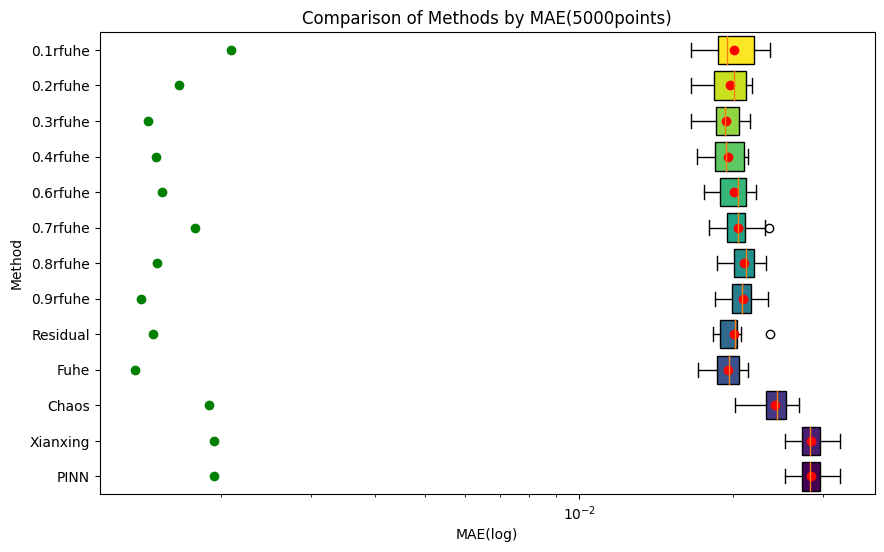

In [12]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.02807552569142597, 0.026350892540899583, 0.030458361079919637, 0.027131099920543255, 0.028696675851474278, 0.02852225052317637, 0.029805745903778543, 0.027524350710277798, 0.025280366140193255, 0.03225033757646488],
    'Xianxing': [0.028054033103662702, 0.02635510712911862, 0.030457375793145957, 0.027132665852182724, 0.028701012215556623, 0.028530252355265198, 0.029808152858481585, 0.027533549241016864, 0.025285639328804163, 0.03225744586196907],
    'Chaos': [0.024340019747159863, 0.021980972087964352, 0.026926484466809064, 0.023150639114440215, 0.02446331784078152, 0.02547558502072128, 0.02334505544219364, 0.02479041023660631, 0.020185466279451763, 0.026143388349462483],
    'Fuhe': [0.018429714141243562, 0.02032836485189215, 0.021328783078515896, 0.021144245046131497, 0.01899245614965256, 0.02059805951477098, 0.017056366944634034, 0.019230346780433286, 0.017850647872371003, 0.02006916551126787],
    'Residual': [0.01823592457571145, 0.020210844879823983, 0.019876897420482355, 0.02013172975471511, 0.018393645901690923, 0.02041413187828632, 0.01848469141085342, 0.023593752648755375, 0.02029504058115436, 0.020664588973451352],
    '0.9rfuhe': [0.018427257173307347, 0.021703635155726844, 0.02086454533982046, 0.020591624889082033, 0.019618318730673392, 0.02267879357499841, 0.01966362758845948, 0.023331941413829972, 0.021384441921717835, 0.02069490946879061],
    '0.8rfuhe': [0.01859617917383499, 0.022164169448141216, 0.021351918452841522, 0.021382218053596407, 0.019917758764750597, 0.02317859020747279, 0.01890953995754853, 0.023123593632361158, 0.020573308371651288, 0.021009429802291316],
    '0.7rfuhe': [0.017978827000558393, 0.02106420053067569, 0.021030864746520918, 0.02055852369011756, 0.01934416767140512, 0.02353848392819988, 0.01794915576153383, 0.02309739826435224, 0.01965344467399544, 0.020378999440227603],
    '0.6rfuhe': [0.017878005466673487, 0.020934459584659372, 0.021202212998753016, 0.02041582726719307, 0.019257387580938985, 0.022191317944716356, 0.017523552551063127, 0.02175180151682268, 0.01870311053556374, 0.020467078860698377],
    '0.4rfuhe': [0.019194907803598706, 0.021212338146546147, 0.021403604138163616, 0.019499546549844617, 0.01764944314606646, 0.02109190065978508, 0.018269188357984485, 0.018892663591514872, 0.016991363514137353, 0.02075467452306306],
    '0.3rfuhe': [0.019347850601810213, 0.0181219496432267, 0.02154568188550326, 0.019656471408191663, 0.018822772910573046, 0.021098773341036017, 0.018386804130087094, 0.019235070239779255, 0.01657542888220833, 0.020871257228019628],
    '0.2rfuhe': [0.02072285867141508, 0.018715182271013663, 0.021729577633193577, 0.01946344206341822, 0.01805754667848007, 0.021373878701948037, 0.01820823215859957, 0.020695403882552577, 0.016565085771076054, 0.021335044845676217],
    '0.1rfuhe': [0.020800709857858517, 0.018433242649956886, 0.02232725124485745, 0.019105489978574534, 0.01918045676995692, 0.022577694994948192, 0.018551713751112024, 0.019690533086568016, 0.016518207712206523, 0.0235890090247829]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(5000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

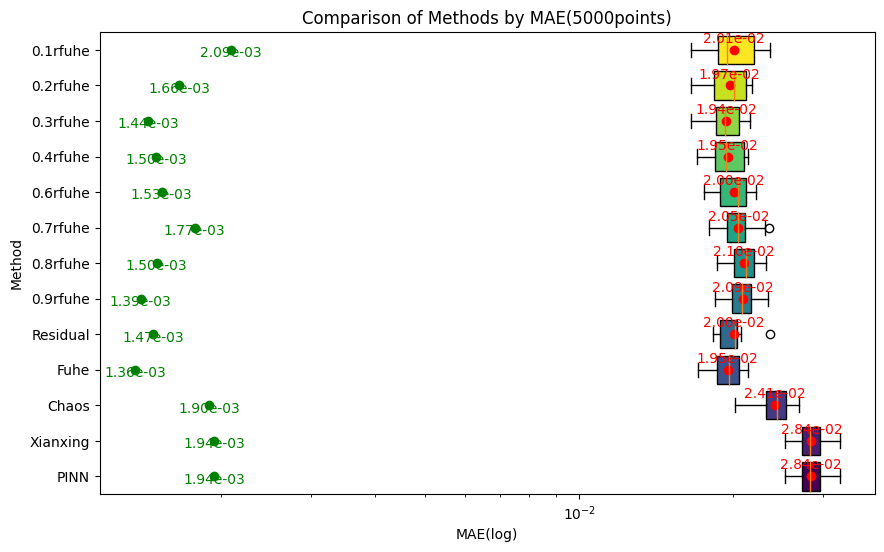

In [13]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.02807552569142597, 0.026350892540899583, 0.030458361079919637, 0.027131099920543255, 0.028696675851474278, 0.02852225052317637, 0.029805745903778543, 0.027524350710277798, 0.025280366140193255, 0.03225033757646488],
    'Xianxing': [0.028054033103662702, 0.02635510712911862, 0.030457375793145957, 0.027132665852182724, 0.028701012215556623, 0.028530252355265198, 0.029808152858481585, 0.027533549241016864, 0.025285639328804163, 0.03225744586196907],
    'Chaos': [0.024340019747159863, 0.021980972087964352, 0.026926484466809064, 0.023150639114440215, 0.02446331784078152, 0.02547558502072128, 0.02334505544219364, 0.02479041023660631, 0.020185466279451763, 0.026143388349462483],
    'Fuhe': [0.018429714141243562, 0.02032836485189215, 0.021328783078515896, 0.021144245046131497, 0.01899245614965256, 0.02059805951477098, 0.017056366944634034, 0.019230346780433286, 0.017850647872371003, 0.02006916551126787],
    'Residual': [0.01823592457571145, 0.020210844879823983, 0.019876897420482355, 0.02013172975471511, 0.018393645901690923, 0.02041413187828632, 0.01848469141085342, 0.023593752648755375, 0.02029504058115436, 0.020664588973451352],
    '0.9rfuhe': [0.018427257173307347, 0.021703635155726844, 0.02086454533982046, 0.020591624889082033, 0.019618318730673392, 0.02267879357499841, 0.01966362758845948, 0.023331941413829972, 0.021384441921717835, 0.02069490946879061],
    '0.8rfuhe': [0.01859617917383499, 0.022164169448141216, 0.021351918452841522, 0.021382218053596407, 0.019917758764750597, 0.02317859020747279, 0.01890953995754853, 0.023123593632361158, 0.020573308371651288, 0.021009429802291316],
    '0.7rfuhe': [0.017978827000558393, 0.02106420053067569, 0.021030864746520918, 0.02055852369011756, 0.01934416767140512, 0.02353848392819988, 0.01794915576153383, 0.02309739826435224, 0.01965344467399544, 0.020378999440227603],
    '0.6rfuhe': [0.017878005466673487, 0.020934459584659372, 0.021202212998753016, 0.02041582726719307, 0.019257387580938985, 0.022191317944716356, 0.017523552551063127, 0.02175180151682268, 0.01870311053556374, 0.020467078860698377],
    '0.4rfuhe': [0.019194907803598706, 0.021212338146546147, 0.021403604138163616, 0.019499546549844617, 0.01764944314606646, 0.02109190065978508, 0.018269188357984485, 0.018892663591514872, 0.016991363514137353, 0.02075467452306306],
    '0.3rfuhe': [0.019347850601810213, 0.0181219496432267, 0.02154568188550326, 0.019656471408191663, 0.018822772910573046, 0.021098773341036017, 0.018386804130087094, 0.019235070239779255, 0.01657542888220833, 0.020871257228019628],
    '0.2rfuhe': [0.02072285867141508, 0.018715182271013663, 0.021729577633193577, 0.01946344206341822, 0.01805754667848007, 0.021373878701948037, 0.01820823215859957, 0.020695403882552577, 0.016565085771076054, 0.021335044845676217],
    '0.1rfuhe': [0.020800709857858517, 0.018433242649956886, 0.02232725124485745, 0.019105489978574534, 0.01918045676995692, 0.022577694994948192, 0.018551713751112024, 0.019690533086568016, 0.016518207712206523, 0.0235890090247829]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(5000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

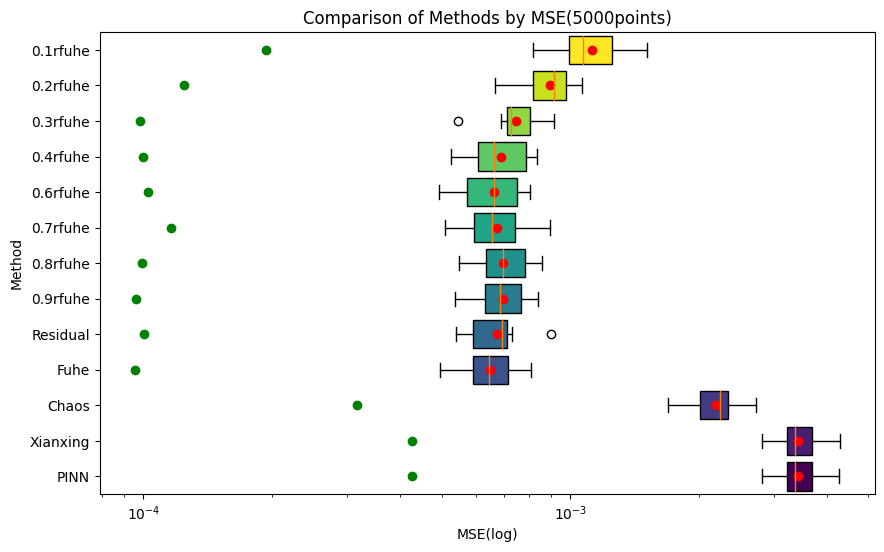

In [14]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.003317733487704717, 0.002873186530537295, 0.0038794297424479163, 0.003207155090904933, 0.0033981465319873963, 0.003424771786380226, 0.003769164205426961, 0.003235045546470796, 0.002817199350655619, 0.004275686645276549],
    'Xianxing': [0.003314472137496139, 0.0028742254550745304, 0.003879360611718832, 0.003207522688970291, 0.003398979625073891, 0.0034270255358532175, 0.0037696742782339686, 0.00323703439406917, 0.002818317878045741, 0.004277718264732627],
    'Chaos': [0.0020862054774641024, 0.0016926792022791371, 0.002727505019993179, 0.0019882721780287577, 0.0022200391954784095, 0.0023282645756829644, 0.0022790842399012566, 0.0023463302634941026, 0.0017350663314994591, 0.0025780023940749435],
    'Fuhe': [0.0005902115738028482, 0.0007152216452729081, 0.0008114523127895687, 0.000708208809200207, 0.000635940568570063, 0.0007588973321539424, 0.0004955636700336958, 0.0006027906105027615, 0.000524159912412988, 0.0006558800287788816],
    'Residual': [0.0005391411416885048, 0.0007130564266592485, 0.0007313786723882859, 0.0006770169996135964, 0.0005824131784462809, 0.000710715311765042, 0.0005632434379424391, 0.0009022814850847228, 0.0006212884058352163, 0.0007053959449965376],
    '0.9rfuhe': [0.0005379098145280274, 0.0007838683236049257, 0.0007145698861905576, 0.0006599549594712478, 0.0006201949373246699, 0.0008419265098947982, 0.0005966475286478364, 0.0008359426259227448, 0.0007076660470336776, 0.0006636279097331619],
    '0.8rfuhe': [0.0005496628876786344, 0.0008086091720202399, 0.0007321900192862171, 0.0006987593426994722, 0.0006308402827110193, 0.0008588936621604724, 0.0005595905382127351, 0.0008003161400307961, 0.0006407735919053974, 0.0006910876203526505],
    '0.7rfuhe': [0.0005412107840456916, 0.0007451588310784604, 0.0007344264976176331, 0.0006530114206994528, 0.0006121655016830753, 0.000897882320157828, 0.0005092392959303048, 0.0008141114354948477, 0.0005884248683111262, 0.0006563675494375473],
    '0.6rfuhe': [0.0005522973363154241, 0.0007565157157333275, 0.0007887483389588858, 0.0006637580360320653, 0.0006304004325614268, 0.0008049991713653061, 0.0004931912866960961, 0.0007330307742573228, 0.0005479655263800675, 0.0006640552083892702],
    '0.4rfuhe': [0.0006751622755427019, 0.0008001943699689908, 0.0008364051101813629, 0.0006475844607770654, 0.0006180232334560685, 0.0008063604801995879, 0.0006059278126271136, 0.000604831410565764, 0.000525720215147319, 0.0007541208972764935],
    '0.3rfuhe': [0.0007245594738175195, 0.0006891568465970205, 0.0009164630853481991, 0.0007695601489057182, 0.0007283052813518521, 0.0008698443058569208, 0.0007085806032185524, 0.0007147262659999899, 0.0005458972515195937, 0.000815932169419434],
    '0.2rfuhe': [0.0009570450620447743, 0.0008770803616422142, 0.0010648654753948087, 0.0008100994760992042, 0.000756905148657037, 0.0010612463269975407, 0.0008373142022770462, 0.0009683665072200649, 0.0006664259528389034, 0.000977745179326565],
    '0.1rfuhe': [0.001128447376523267, 0.0009661542245412614, 0.0013319868994386714, 0.0009746285566070806, 0.0010584198707213012, 0.001292105351607926, 0.0010761212575187455, 0.0010658725590304084, 0.0008201942928923416, 0.001516025278973754]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(5000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

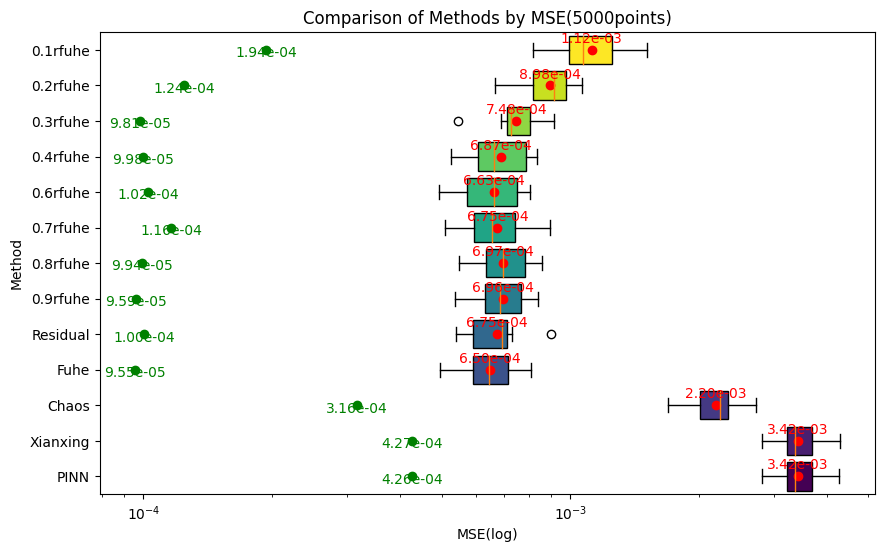

In [15]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.003317733487704717, 0.002873186530537295, 0.0038794297424479163, 0.003207155090904933, 0.0033981465319873963, 0.003424771786380226, 0.003769164205426961, 0.003235045546470796, 0.002817199350655619, 0.004275686645276549],
    'Xianxing': [0.003314472137496139, 0.0028742254550745304, 0.003879360611718832, 0.003207522688970291, 0.003398979625073891, 0.0034270255358532175, 0.0037696742782339686, 0.00323703439406917, 0.002818317878045741, 0.004277718264732627],
    'Chaos': [0.0020862054774641024, 0.0016926792022791371, 0.002727505019993179, 0.0019882721780287577, 0.0022200391954784095, 0.0023282645756829644, 0.0022790842399012566, 0.0023463302634941026, 0.0017350663314994591, 0.0025780023940749435],
    'Fuhe': [0.0005902115738028482, 0.0007152216452729081, 0.0008114523127895687, 0.000708208809200207, 0.000635940568570063, 0.0007588973321539424, 0.0004955636700336958, 0.0006027906105027615, 0.000524159912412988, 0.0006558800287788816],
    'Residual': [0.0005391411416885048, 0.0007130564266592485, 0.0007313786723882859, 0.0006770169996135964, 0.0005824131784462809, 0.000710715311765042, 0.0005632434379424391, 0.0009022814850847228, 0.0006212884058352163, 0.0007053959449965376],
    '0.9rfuhe': [0.0005379098145280274, 0.0007838683236049257, 0.0007145698861905576, 0.0006599549594712478, 0.0006201949373246699, 0.0008419265098947982, 0.0005966475286478364, 0.0008359426259227448, 0.0007076660470336776, 0.0006636279097331619],
    '0.8rfuhe': [0.0005496628876786344, 0.0008086091720202399, 0.0007321900192862171, 0.0006987593426994722, 0.0006308402827110193, 0.0008588936621604724, 0.0005595905382127351, 0.0008003161400307961, 0.0006407735919053974, 0.0006910876203526505],
    '0.7rfuhe': [0.0005412107840456916, 0.0007451588310784604, 0.0007344264976176331, 0.0006530114206994528, 0.0006121655016830753, 0.000897882320157828, 0.0005092392959303048, 0.0008141114354948477, 0.0005884248683111262, 0.0006563675494375473],
    '0.6rfuhe': [0.0005522973363154241, 0.0007565157157333275, 0.0007887483389588858, 0.0006637580360320653, 0.0006304004325614268, 0.0008049991713653061, 0.0004931912866960961, 0.0007330307742573228, 0.0005479655263800675, 0.0006640552083892702],
    '0.4rfuhe': [0.0006751622755427019, 0.0008001943699689908, 0.0008364051101813629, 0.0006475844607770654, 0.0006180232334560685, 0.0008063604801995879, 0.0006059278126271136, 0.000604831410565764, 0.000525720215147319, 0.0007541208972764935],
    '0.3rfuhe': [0.0007245594738175195, 0.0006891568465970205, 0.0009164630853481991, 0.0007695601489057182, 0.0007283052813518521, 0.0008698443058569208, 0.0007085806032185524, 0.0007147262659999899, 0.0005458972515195937, 0.000815932169419434],
    '0.2rfuhe': [0.0009570450620447743, 0.0008770803616422142, 0.0010648654753948087, 0.0008100994760992042, 0.000756905148657037, 0.0010612463269975407, 0.0008373142022770462, 0.0009683665072200649, 0.0006664259528389034, 0.000977745179326565],
    '0.1rfuhe': [0.001128447376523267, 0.0009661542245412614, 0.0013319868994386714, 0.0009746285566070806, 0.0010584198707213012, 0.001292105351607926, 0.0010761212575187455, 0.0010658725590304084, 0.0008201942928923416, 0.001516025278973754]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(5000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

In [17]:
(6.75e-04-6.50e-04)/6.75e-04

0.03703703703703713